<a href="https://colab.research.google.com/github/pdpcosta/COVID-19_Brazil/blob/master/Python/COVID_19_Brazil_States.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Reading Brazilian data
urlbr='https://raw.githubusercontent.com/pdpcosta/COVID-19_Brazil/master/DATA/COVID-19_Brazil_CONFIRMED_DEATH.csv'
dfbr=pd.read_csv(urlbr)
#print(dfbr)
dfbr['Date']=pd.to_datetime(dfbr['Date'])
#df=df.astype({"Confirmed":int})
#print(dfbr.dtypes)
dfbr=dfbr.dropna()


# Identifying the Top 5 States in Number of Confirmed Cases


In [5]:
topfivestates=dfbr[dfbr.Date==pd.Timestamp(2020,3,31)].sort_values('Confirmed',ascending = False).head(5)
print ("Top 5 States in Number of Cases\n",topfivestates)


Top 5 States in Number of Cases
         Region State       Date  Confirmed  Death
935  Southeast    SP 2020-03-31     2339.0    136
683  Southeast    RJ 2020-03-31      708.0     23
215  Northeast    CE 2020-03-31      401.0      5
251    Midwest    DF 2020-03-31      333.0      3
827      South    RS 2020-03-31      305.0      4


# A Simple Graph of the Top 5 States in Confirmed Cases

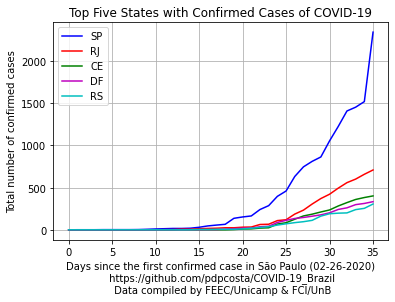

In [10]:
# SP was the first state with confirmed cases in Brazil, so it is used as a reference.
sp=dfbr[dfbr.State=="SP"]
days_sp=np.asarray(range(len(sp)))
sp_epidemy=sp[(sp['Confirmed']>0)]


n1state=topfivestates["State"].iloc[0]
n2state=topfivestates["State"].iloc[1]
n3state=topfivestates["State"].iloc[2]
n4state=topfivestates["State"].iloc[3]
n5state=topfivestates["State"].iloc[4]

confirmedn1=dfbr[(dfbr['State']==n1state)]
confirmedn2=dfbr[(dfbr['State']==n2state)]
confirmedn3=dfbr[(dfbr['State']==n3state)]
confirmedn4=dfbr[(dfbr['State']==n4state)]
confirmedn5=dfbr[(dfbr['State']==n5state)]
#print(n1state,n2state,n3state,n4state,n5state)

plt.title("Top Five States with Confirmed Cases of COVID-19")
plt.plot(days_sp,confirmedn1['Confirmed'],label=n1state,color="b") #Real data
plt.plot(days_sp,confirmedn2['Confirmed'],label=n2state,color="r") #Real data
plt.plot(days_sp,confirmedn3['Confirmed'],label=n3state,color="g") #Real data
plt.plot(days_sp,confirmedn4['Confirmed'],label=n4state,color="m") #Real data
plt.plot(days_sp,confirmedn5['Confirmed'],label=n5state,color="c") #Real data
plt.grid()

plt.legend(loc="upper left")
plt.xlabel("Days since the first confirmed case in São Paulo (02-26-2020)\n https://github.com/pdpcosta/COVID-19_Brazil\n Data compiled by FEEC/Unicamp & FCI/UnB")
plt.ylabel("Total number of confirmed cases")
plt.show()



# A data-based Logistic Model for São Paulo, considering the time series

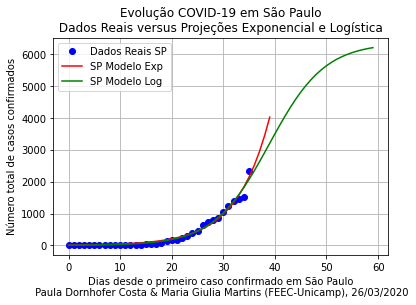

In [11]:


sp_epidemy=sp[(sp['Confirmed']>0)]
sp_day1=sp_epidemy['Date'].iloc[0]
sp_day1=sp_day1-pd.Timedelta(days=1)
sp_epidemy=sp[(sp['Date']>=sp_day1)]

# print(sp_epidemy)

def exponential_model(x, a, b, c):
     return a*np.exp(b*(x-c))

def logistic_model (x, a, b, c):
  return c/(1+np.exp(-(x-b)/a))

expfit_sp=curve_fit(exponential_model,np.asarray(range(len(sp_epidemy))),sp_epidemy['Confirmed'],p0=[1,1,1])
logfit_sp=curve_fit(logistic_model,np.asarray(range(len(sp_epidemy))),sp_epidemy['Confirmed'],p0=[1,1,1])

days1=np.asarray(range(len(sp_epidemy))) # SP is the first state with epidemy in Brazil
days=np.asarray(range(60))
plt.title("Evolução COVID-19 em São Paulo\n Dados Reais versus Projeções Exponencial e Logística ")
plt.plot(days1,sp_epidemy['Confirmed'],'ro',label="Dados Reais SP",color="b") #Real data
plt.plot(np.asarray(range(len(sp_epidemy)+4)), [exponential_model(i,expfit_sp[0][0],expfit_sp[0][1],expfit_sp[0][2]) for i in np.asarray(range(len(sp_epidemy)+4))], label="SP Modelo Exp", color = 'r' )#Predicted logistic curve)
plt.plot(days, [logistic_model(i,logfit_sp[0][0],logfit_sp[0][1],logfit_sp[0][2]) for i in days], label="SP Modelo Log", color = 'g' )#Predicted logistic curve
plt.grid()

plt.legend(loc="upper left")
plt.xlabel("Dias desde o primeiro caso confirmado em São Paulo\n Paula Dornhofer Costa & Maria Giulia Martins (FEEC-Unicamp), 26/03/2020")
plt.ylabel("Número total de casos confirmados")
plt.show()



# How the model changed in the last 3 days for São Paulo

This plot shows how the logistic regression is sensitive to new data. 

Logistic regression is not appropriate for this type of analysis. It is being used here just as graphical exploration for the following few days.

Our dataset has data until 2020-03-26.
In *red*, we see the logistic model obtained with São Paulo data until 2020-03-24 (2 days before).

In *yellow*, we see the logistic model obtained with São Paulo data until 2020-03-25 (1 day before).

Finally, in *green*, we see the logistic model obtained with most recent data.

This graph may suggest that São Paulo was slowing the growing rate up to 25, March but it gained speed yesterday.

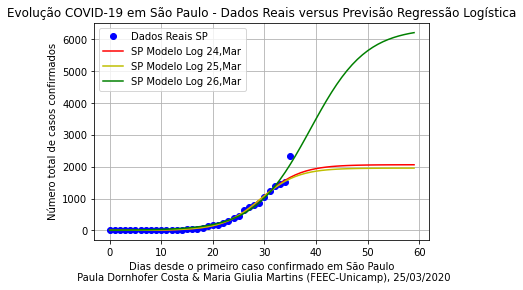

In [12]:
db2=sp_epidemy.tail(2)['Date'].iloc[0] # 2 days before
db3=sp_epidemy.tail(3)['Date'].iloc[0] # 3 days before
logfit_sp_db2=curve_fit(logistic_model,np.asarray(range(len(sp_epidemy)-1)),sp_epidemy.loc[sp_epidemy['Date']<=db2,'Confirmed'],p0=[1,1,1])
logfit_sp_db3=curve_fit(logistic_model,np.asarray(range(len(sp_epidemy)-2)),sp_epidemy.loc[sp_epidemy['Date']<=db3,'Confirmed'],p0=[1,1,1])

plt.title("Evolução COVID-19 em São Paulo - Dados Reais versus Previsão Regressão Logística")
plt.plot(days1,sp_epidemy['Confirmed'],'ro',label="Dados Reais SP",color="b") #Real data
plt.plot(days, [logistic_model(i,logfit_sp_db3[0][0],logfit_sp_db3[0][1],logfit_sp_db3[0][2]) for i in days], label="SP Modelo Log 24,Mar", color = 'r' )#Predicted logistic curve
plt.plot(days, [logistic_model(i,logfit_sp_db2[0][0],logfit_sp_db2[0][1],logfit_sp_db2[0][2]) for i in days], label="SP Modelo Log 25,Mar", color = 'y' )#Predicted logistic curve
plt.plot(days, [logistic_model(i,logfit_sp[0][0],logfit_sp[0][1],logfit_sp[0][2]) for i in days], label="SP Modelo Log 26,Mar", color = 'g' )#Predicted logistic curve
plt.grid()

plt.legend(loc="upper left")
plt.xlabel("Dias desde o primeiro caso confirmado em São Paulo\n Paula Dornhofer Costa & Maria Giulia Martins (FEEC-Unicamp), 25/03/2020")
plt.ylabel("Número total de casos confirmados")
plt.show()


# A similar analysis for RJ

Logistic regression is not appropriate for this type of analysis. It is being used here just as graphical exploration for the following few days.

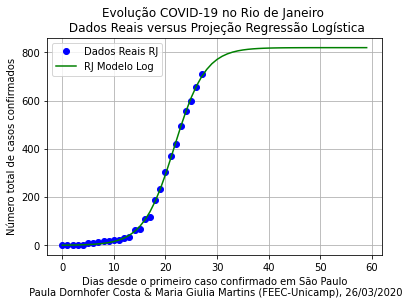

In [14]:
rj=dfbr[dfbr.State=="RJ"]

rj_epidemy=rj[(rj['Confirmed']>0)]
rj_day1=rj_epidemy['Date'].iloc[0]
rj_day1=rj_day1-pd.Timedelta(days=1)
rj_epidemy=rj[(rj['Date']>=rj_day1)]

#expfit_rj=curve_fit(exponential_model,np.asarray(range(len(rj_epidemy))),rj_epidemy['Confirmed'],p0=[1,1,1])
logfit_rj=curve_fit(logistic_model,np.asarray(range(len(rj_epidemy))),rj_epidemy['Confirmed'],p0=[1,1,1])

days=np.asarray(range(60))
plt.title("Evolução COVID-19 no Rio de Janeiro \n Dados Reais versus Projeção Regressão Logística")
plt.plot(np.asarray(range(len(rj_epidemy))),rj_epidemy['Confirmed'],'ro',label="Dados Reais RJ",color="b") #Real data
#plt.plot(np.asarray(range(len(rj_epidemy)+4)), [exponential_model(i,expfit_rj[0][0],expfit_rj[0][1],expfit_rj[0][2]) for i in np.asarray(range(len(rj_epidemy)+4))], label="RJ Modelo Exp", color = 'r' )#Predicted exponential curve)
plt.plot(days, [logistic_model(i,logfit_rj[0][0],logfit_rj[0][1],logfit_rj[0][2]) for i in days], label="RJ Modelo Log", color = 'g' )#Predicted logistic curve
plt.grid()

plt.legend(loc="upper left")
plt.xlabel("Dias desde o primeiro caso confirmado em São Paulo\n Paula Dornhofer Costa & Maria Giulia Martins (FEEC-Unicamp), 26/03/2020")
plt.ylabel("Número total de casos confirmados")
plt.show()
